# Machine Learning Approach For Heart Attack Prediction
# Framingham DATASET

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

## Importing Data

In [2]:
df = pd.read_csv('/kaggle/input/framingham/other/default/1/framingham.csv')
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## view First five rows

In [3]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Information of the dataframe

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## There is Null so we will put the Median instead of the null values

In [5]:
df.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Change the nullvalues to The median of the features that have nulls

In [6]:
List_Nullfeatures = ["education", "cigsPerDay", "BPMeds", "totChol","BMI", "heartRate", "glucose"]
for i in range(len(List_Nullfeatures)):
    median_value = df[List_Nullfeatures[i]].median()
    df[List_Nullfeatures[i]].fillna(median_value, inplace=True)
df.head()

/tmp/ipykernel_17/2200964361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[List_Nullfeatures[i]].fillna(median_value, inplace=True)
/tmp/ipykernel_17/2200964361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Check again for nullValues

In [7]:
df.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### So now our data have not any null values and all the data are numerical
#### So we dont have to convert the type of the data

## Number of people that may be have Heart Attack

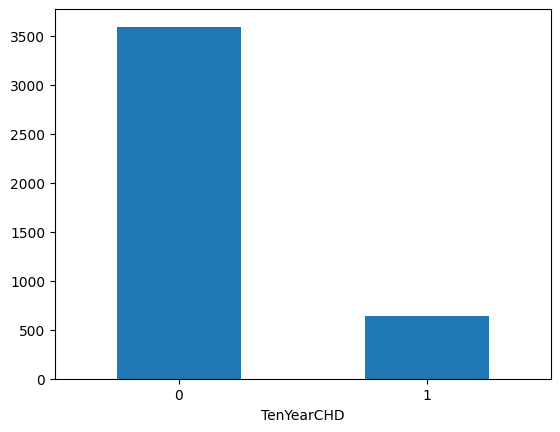

In [8]:
df["TenYearCHD"].value_counts().plot(kind="bar")
plt.tick_params(labelrotation=0)
plt.show()

## Distribution of Ages in the data

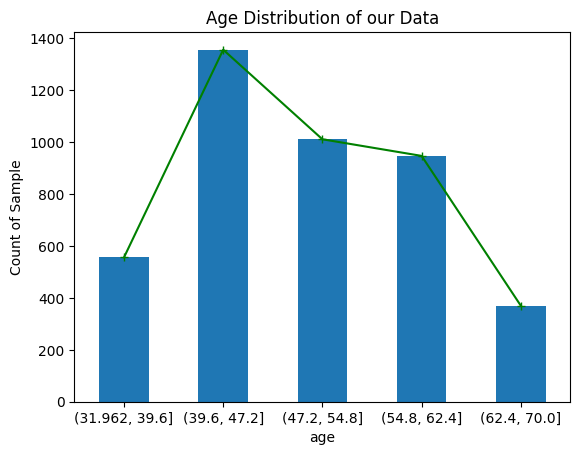

In [9]:
df.age.groupby(pd.cut(df["age"], 5),observed=False).count().plot(kind="bar")
df.age.groupby(pd.cut(df["age"], 5),observed = False).count().plot(kind="line", marker='+', color="Green")
plt.tick_params(labelrotation=0)
plt.title("Age Distribution of our Data")
plt.ylabel("Count of Sample")
plt.show()

## Age Wise Disease distribution

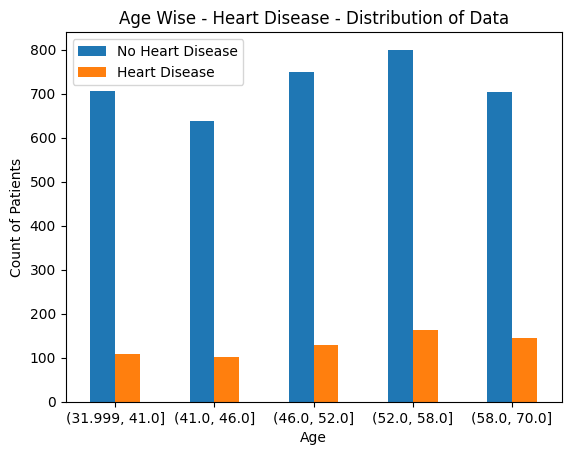

In [10]:
pd.crosstab(df["age"], df["TenYearCHD"]).groupby(pd.qcut(df["age"], 5),observed=False).sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Count of Patients")
plt.title("Age Wise - Heart Disease - Distribution of Data")
plt.show()

## BMI in Correlation With Heart Disease

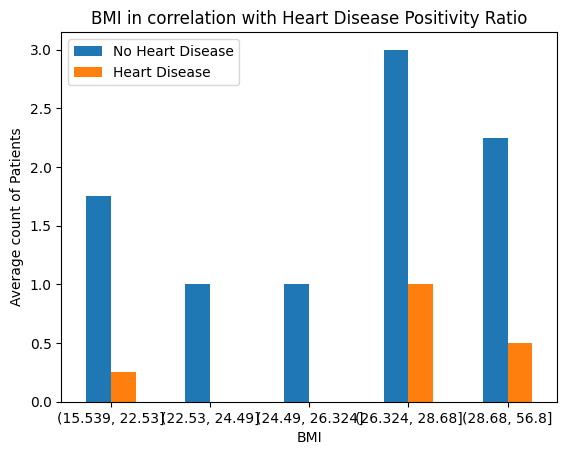

In [11]:
pd.crosstab(df["BMI"],df["TenYearCHD"]).groupby(pd.qcut(df.BMI, 5),observed=False).mean().plot(kind="bar")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel("Average count of Patients")
plt.xlabel("BMI")
plt.title("BMI in correlation with Heart Disease Positivity Ratio")
plt.tick_params(labelrotation=0)
plt.show()

## Correlation Matrix

We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

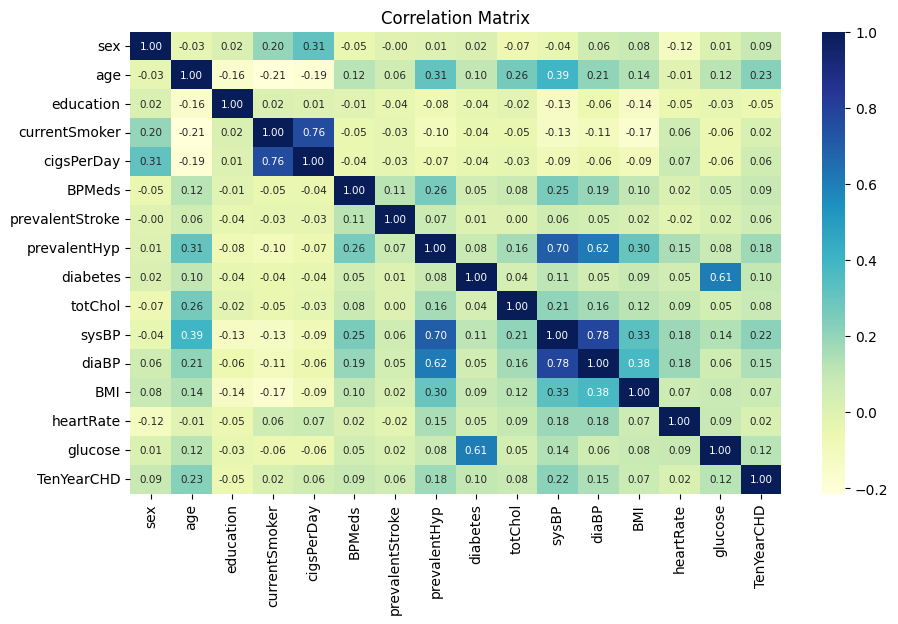

In [12]:
fig, ax = plt.subplots(figsize=(10.5,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

## Drop feature Education from the dataframe

In [13]:
df = df.drop(['education'], axis=1)

In [14]:
df

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Feature Scaling 
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [16]:
df.describe()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,0.462637,0.494104,0.127776,0.029245,0.005896,0.310613,0.025708,0.220149,0.230991,0.369288,0.248643,0.322008,0.117517,0.151887
std,0.495027,0.225604,0.500024,0.170068,0.168513,0.076569,0.462799,0.158280,0.075261,0.104176,0.126036,0.098662,0.121454,0.064577,0.358953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168081,0.158392,0.285714,0.182683,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215620,0.210402,0.359788,0.238972,0.313131,0.107345,0.000000
75%,1.000000,0.631579,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.263158,0.286052,0.444444,0.302775,0.393939,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Resampling imbalanced Dataset
Checking balance of outcome variable

Class 0: 3596
Class 1: 644
Proportion: 5.58 : 1


/tmp/ipykernel_17/2008571184.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df.TenYearCHD, palette="OrRd")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


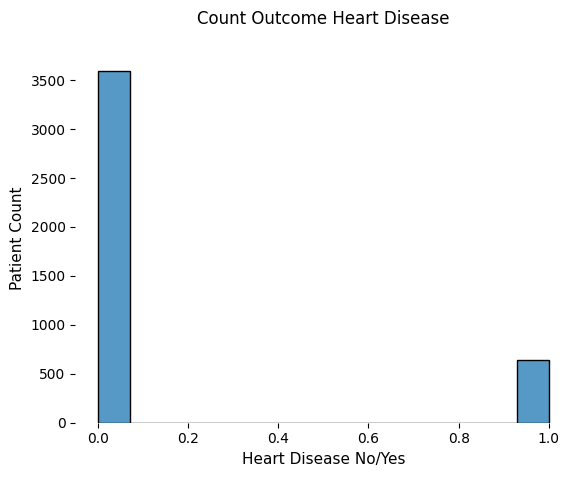

In [17]:
target_count = df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.histplot(df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

## Getting Features and Target Data ready for Use

In [18]:
X = df.drop("TenYearCHD", axis=1) # Feature data (Independant Dataset)
y=df["TenYearCHD"] # Target Data (Dependant Dataset)
# Shape Function show the number of rows and number of features so sahpe x is 4240 row for each the 14 feature and y is just the target which is one column with 4240 row
X.shape, y.shape

((4240, 14), (4240,))

## Modeling

Splitting X and Y Data in Train and Test Data,
Then Fitting the train data to the model.
And Checking the score for the Created Model.
    
model_dict = Model Dictionery (Dictionery of Model we have selected)
X = Feature Labels
y = Target Data
test_size = Test Split Size to split data in Test and Train sets

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

model_dict = {"Logistic_Regression" : LogisticRegression(),
              "Decision_Tree" : DecisionTreeClassifier(),
              "Gradient_Boosting" : GradientBoostingClassifier(),
              "Random_Forest" : RandomForestClassifier(),
             "KNN_Classifier" : KNeighborsClassifier(),
             "SVC" : SVC()}

def model_fit_and_score(model_dict, X, y, test_size=0.10):
    
    model_score={} # Dictionary to append Scores of fitted model
    
    np.random.seed(41) # To get same values every time
    # Splitting Data in Train and Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    for name, model in model_dict.items():
        # Fit Model
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    scores = pd.DataFrame(model_score, index=["Score"])
    scores.T.plot(kind="bar")
    plt.title("Scores of these Models")
    plt.xticks(rotation=0)
    plt.xlabel("Model Name")
    plt.ylabel("Score of Model")
    return scores

,Logistic_Regression,Decision_Tree,Gradient_Boosting,Random_Forest,KNN_Classifier,SVC
Score,0.849057,0.764151,0.837264,0.841981,0.834906,0.841981


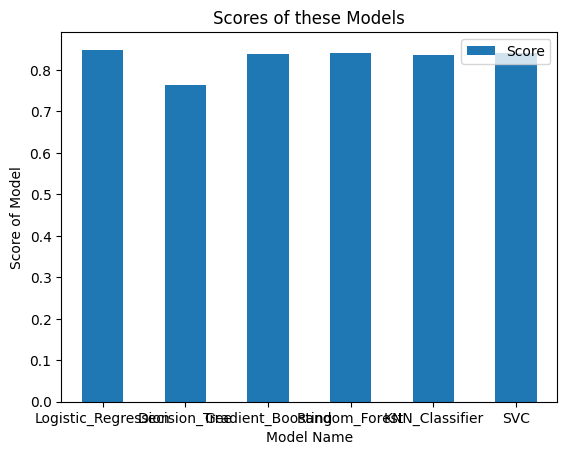

In [20]:
model_fit_and_score(model_dict, X, y, test_size=0.10)

## Cross Validation for Models in Model Dictionary
### Providing Mean value of cross validation for each Parameter
    
Parameter Includes : accuracy, precision, recall, f1_micro, f1_macro
    
model_dict : Model Dictionery with/without parameter tuning
    X : Feature Data
    y : Target Data
    cv : Cross Validation folds (Default = 5)

In [21]:
def model_cross_val_score(model_dict, X, y, cv=5):
    warnings.filterwarnings("ignore")
    
    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]
    
    cv_score = {} # To append Scores of each Model
     
    
    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

In [22]:
model_cross_val_score(model_dict, X, y, cv=5)

,Logistic_Regression,Decision_Tree,Gradient_Boosting,Random_Forest,KNN_Classifier,SVC
accuracy,0.853774,0.756132,0.850472,0.850708,0.835613,0.847170
precision,0.730684,0.237028,0.543959,0.563462,0.364162,0.246667
recall,0.063675,0.267139,0.085380,0.058963,0.113324,0.007752
f1_micro,0.853774,0.758019,0.849764,0.845755,0.835613,0.847170
f1_macro,0.518527,0.551712,0.532291,0.511493,0.540262,0.466086


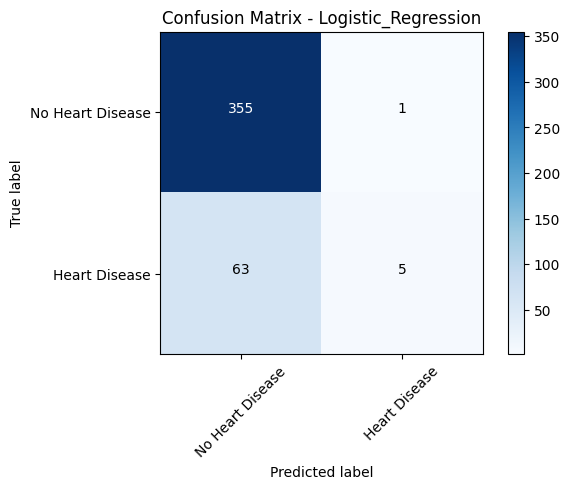

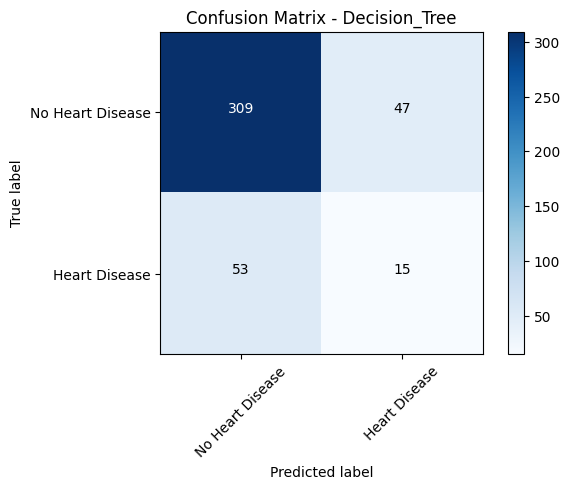

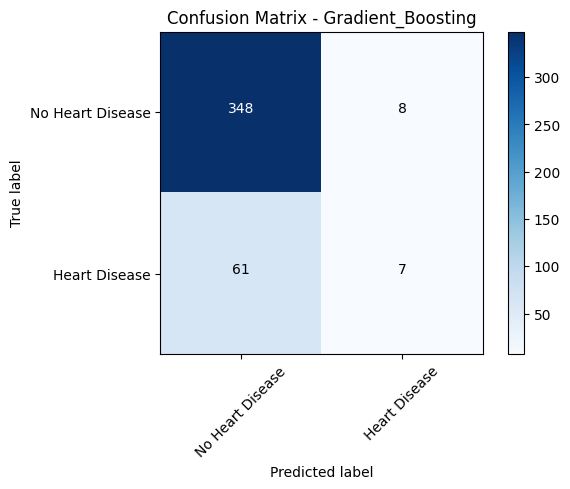

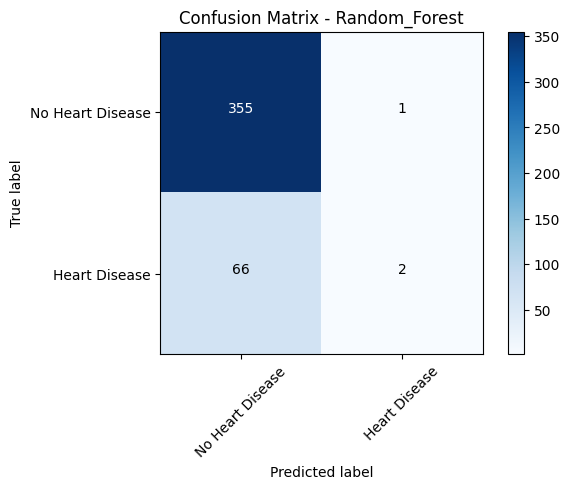

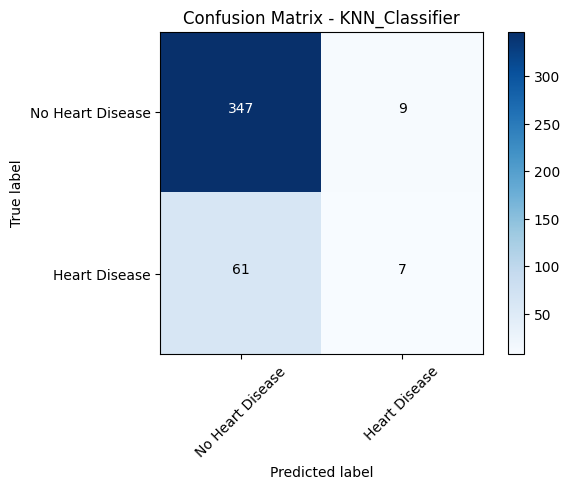

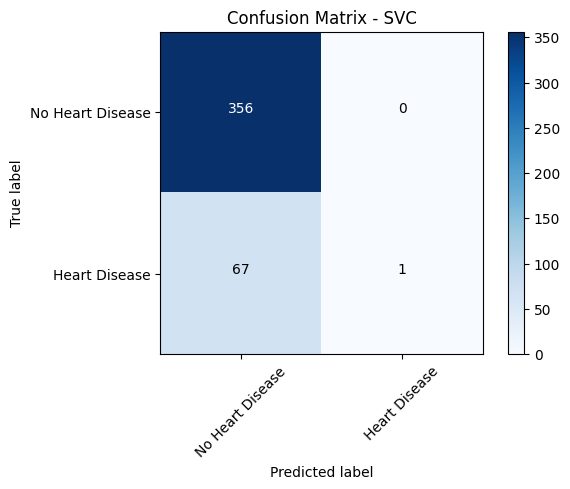

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to calculate and plot confusion matrix for each classifier
def plot_confusion_matrices(model_dict, X, y, test_size=0.10):
    np.random.seed(41) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cnf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease', 'Heart Disease'], title=f'Confusion Matrix - {name}')

# Calling the function
plot_confusion_matrices(model_dict, X, y, test_size=0.10)
plt.show()
